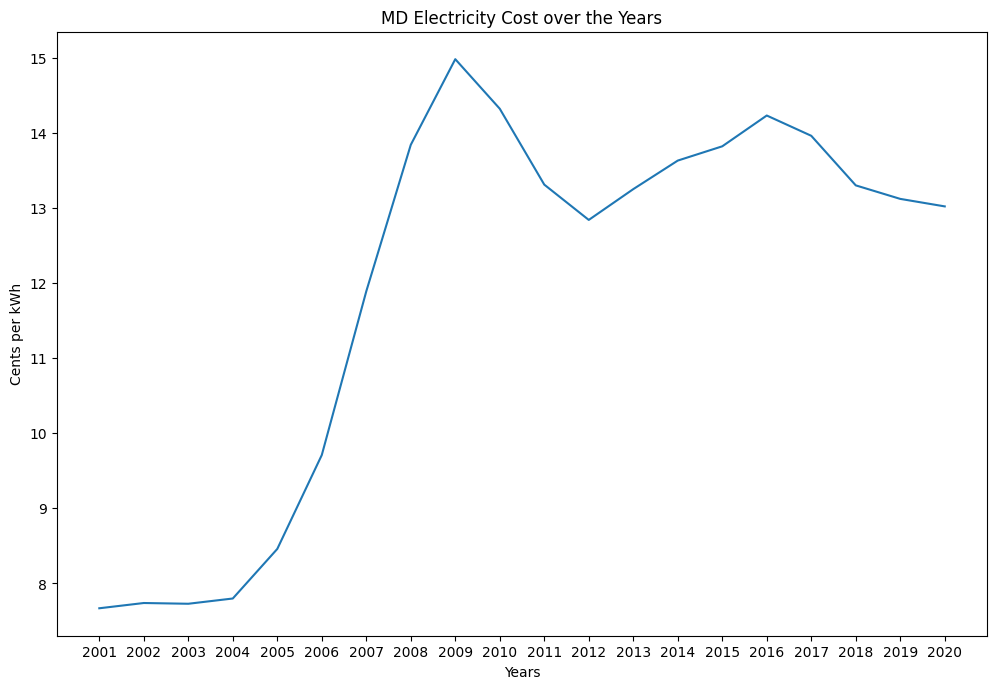

In [101]:
import requests
import json
import numpy as np
from matplotlib import pyplot as plt
# retrieve api key for EIA database
file = open("./keys/eia_key.txt")
eia_key = file.readline().strip()

# function to build full URL to call
def buildURL(base_url, seriesID, key):
    return base_url + "series_id=" + series_id \
    + "&api_key=" + key

# base url and then building the full_url to call for API
base_url = "http://api.eia.gov/series/?"
series_id = "ELEC.PRICE.MD-RES.A"
full_url = buildURL(base_url, series_id, eia_key)

# call API and store response in r
r = requests.get(full_url)

# convert to json and then extract data
raw_data = json.loads(r.text)
try:
    data = raw_data['series'][0]['data']
except Exception as e:
    print("A problem occured while accessing: " + str(e))

# reverse the data since it earliest to last
data.reverse()
coordinates = np.array(data)

# Transpose the data into the x / y coordinates and convert the cost val's to floats
x, y = coordinates.T
y = y.astype(float)

# plot the graph
plt.figure(figsize=(12,8), dpi = 100, facecolor='w', edgecolor='k')
plt.plot(x,y)
plt.title('MD Electricity Cost over the Years')
plt.xlabel('Years')
plt.ylabel('Cents per kWh')
plt.show()

In [119]:
series_id ='ELEC.PRICE.ALL-MD-10.M'
full_url = buildURL(base_url, 'ELEC.PRICE.ALL-MD-10.M', eia_key)

In [120]:
full_url

'http://api.eia.gov/series/?series_id=ELEC.PRICE.ALL-MD-10.M&api_key=6640ae7c48ad458aa6502d66715df62d'